In [1]:
import numpy as np
import importlib as il
import matplotlib.pyplot as plt
import math
import pandas as pd
import utils as u

import classifiers as cl

%matplotlib inline

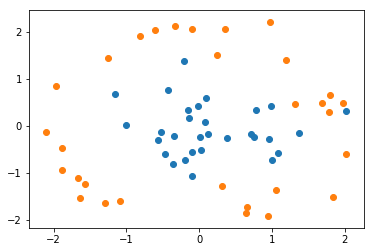

In [2]:
n1 = 30
n2 = 30
r = 2

X1 = np.random.randn(n1, 2) *0.7
theta = np.random.rand(n2) * 2*math.pi
X2 = np.random.randn(n2, 2)*0.2 +  np.stack( [ r* np.cos(theta) , r*np.sin(theta) ] , axis=-1)


plt.scatter(X1[:,0], X1[:,1]);
plt.scatter(X2[:,0], X2[:,1]);

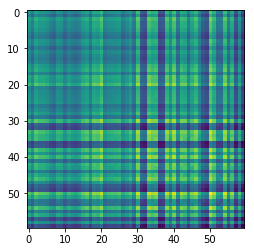

In [3]:
X = np.vstack([X1,X2]) + 10
y = np.hstack([np.ones(n1), -np.ones(n2)])
K = X@X.T
plt.imshow(K)

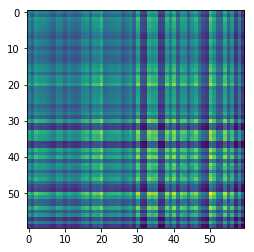

In [4]:
K2 = (K+0.1)**2
plt.imshow(K2)

In [5]:
KK = K2

In [6]:
il.reload(cl)
svm = cl.KSVM()

In [7]:
def kernel2(X,Y):
    return (X@(Y.T) +0.1)**2

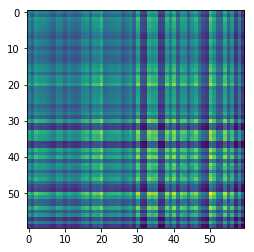

In [8]:
plt.imshow(kernel2(X,X))

In [9]:
np.linalg.matrix_rank(K)

2

In [10]:
a = svm.train(X, y, kernel2, 0.001, center =False)

     pcost       dcost       gap    pres   dres
 0: -1.9815e+02 -3.3678e+03  6e+03  6e-01  7e-10
 1: -1.9517e+02 -9.1411e+02  7e+02  2e-16  5e-10
 2: -2.3901e+02 -3.7512e+02  1e+02  1e-16  7e-10
 3: -2.7405e+02 -3.1615e+02  4e+01  2e-16  6e-10
 4: -2.8881e+02 -2.9853e+02  1e+01  2e-16  8e-10
 5: -2.9173e+02 -2.9539e+02  4e+00  2e-16  8e-10
 6: -2.9261e+02 -2.9407e+02  1e+00  2e-16  7e-10
 7: -2.9308e+02 -2.9345e+02  4e-01  2e-16  7e-10
 8: -2.9323e+02 -2.9329e+02  6e-02  2e-16  6e-10
 9: -2.9325e+02 -2.9325e+02  9e-04  2e-16  8e-10
10: -2.9325e+02 -2.9325e+02  9e-06  2e-16  7e-10
Optimal solution found.


In [11]:
b = svm.train_fromK(KK, y, 0.001)

     pcost       dcost       gap    pres   dres
 0: -1.9815e+02 -3.3678e+03  6e+03  6e-01  7e-10
 1: -1.9517e+02 -9.1411e+02  7e+02  2e-16  5e-10
 2: -2.3901e+02 -3.7512e+02  1e+02  1e-16  7e-10
 3: -2.7405e+02 -3.1615e+02  4e+01  2e-16  6e-10
 4: -2.8881e+02 -2.9853e+02  1e+01  2e-16  8e-10
 5: -2.9173e+02 -2.9539e+02  4e+00  2e-16  8e-10
 6: -2.9261e+02 -2.9407e+02  1e+00  2e-16  7e-10
 7: -2.9308e+02 -2.9345e+02  4e-01  2e-16  7e-10
 8: -2.9323e+02 -2.9329e+02  6e-02  2e-16  6e-10
 9: -2.9325e+02 -2.9325e+02  9e-04  2e-16  8e-10
10: -2.9325e+02 -2.9325e+02  9e-06  2e-16  7e-10
Optimal solution found.


In [12]:
ypred = svm.predict_score(X)

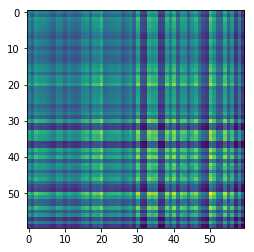

In [13]:
plt.imshow(svm.Ktrain)

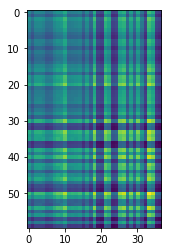

In [14]:
plt.imshow(svm.Kpred)

In [15]:
svm.support_vectors

array([ 0,  1,  3,  4,  8, 12, 14, 15, 16, 19, 20, 22, 23, 24, 25, 26, 28,
       29, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 46, 47, 49, 50,
       54, 57, 59], dtype=int64)

In [16]:
s=0

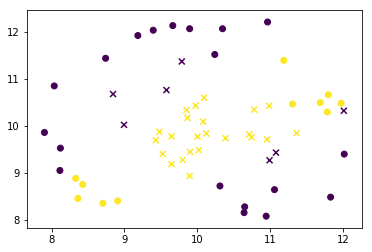

In [17]:
plt.scatter(X[:n1,0], X[:n1,1], marker = 'x' , c = ypred[:n1]>s)
plt.scatter(X[n1:,0], X[n1:,1], marker = 'o' , c = ypred[n1:]>s)

## Dataset 0 :


In [28]:
il.reload(u)

<module 'utils' from 'C:\\Users\\lemin\\Documents\\MVA\\kernels\\Kernel_methods_challenge\\utils.py'>

In [29]:
data_path = './data/'
#data_path = 'kernel-methods-for-machine-learning-2018-2019/"
Xdf=pd.read_csv(data_path+'Xtr0.csv', sep=',')
Xtr0 = np.array(Xdf)[:,1]

Ydf=pd.read_csv(data_path+'/Ytr0.csv', sep = ',')
ytr0 = np.array(Ydf)[:,1]

Xtr0.shape

(2000,)

In [30]:
Xdf=pd.read_csv(data_path+'/Xte0.csv', sep=',')
Xte0 = np.array(Xdf)[:,1]
Xte0.shape

(1000,)

In [31]:
#Xtrain0, ytrain0, Xval0, yval0 = u.train_val_split(Xtr0, ytr0, p)

NameError: name 'p' is not defined

#### Spectrum Kernel : 

In [32]:
import Spectrum as sp
il.reload(sp)

<module 'Spectrum' from 'C:\\Users\\lemin\\Documents\\MVA\\kernels\\Kernel_methods_challenge\\Spectrum.py'>

In [39]:
SP = sp.spectrum(3)
SP.compute_Graam(Xtr0)

True

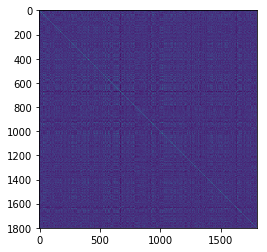

In [223]:
plt.imshow(SP.Graam)

In [224]:
il.reload(cl);

In [239]:
svm = cl.KSVM()
svm.train_fromK(SP.Graam, ytrain0, 0.001)

     pcost       dcost       gap    pres   dres
 0: -1.0441e+03 -1.2902e+03  2e+04  1e+01  4e-12
 1: -3.7146e+02 -1.1685e+03  2e+03  7e-01  4e-12
 2: -3.3843e+02 -5.8850e+02  3e+02  2e-16  1e-12
 3: -3.8972e+02 -4.3349e+02  4e+01  2e-16  1e-12
 4: -4.0409e+02 -4.1698e+02  1e+01  2e-16  1e-12
 5: -4.0779e+02 -4.1267e+02  5e+00  2e-16  1e-12
 6: -4.0904e+02 -4.1119e+02  2e+00  2e-16  1e-12
 7: -4.0963e+02 -4.1050e+02  9e-01  2e-16  1e-12
 8: -4.0991e+02 -4.1017e+02  3e-01  2e-16  1e-12
 9: -4.1001e+02 -4.1006e+02  5e-02  2e-16  1e-12
10: -4.1003e+02 -4.1004e+02  1e-02  2e-16  1e-12
11: -4.1004e+02 -4.1004e+02  8e-04  2e-16  2e-12
12: -4.1004e+02 -4.1004e+02  4e-05  2e-16  2e-12
Optimal solution found.


True

In [240]:
Kval = SP.compute_embedding(Xval0)

In [241]:
ypred0 = (svm.predict_fromK(Kval)*2)-1

In [242]:
u.accuracy(yval0, ypred0)

0.615

In [40]:
SP.Graam

array([[258., 169., 204., ..., 168., 162., 145.],
       [169., 302., 126., ..., 260., 123., 120.],
       [204., 126., 274., ..., 106., 180., 192.],
       ...,
       [168., 260., 106., ..., 454.,  91.,  76.],
       [162., 123., 180., ...,  91., 272., 162.],
       [145., 120., 192., ...,  76., 162., 298.]])

In [41]:
Xtr0

array(['GGAGAATCATTTGAACCCGGGAGGTGGAGGTTGCCGTGAGCTGAGATTGCGCCATTGCACTCCAGCCTGGGCAACAAGAGCAAAACTCTGTCTCACAAAAC',
       'ACCCTGCCTACACCGCGGCGGGGACAGGTGGAGGTTTCAACCCCTGTTTGGCAACCTCGGGCGCAGCCAGGCCCCGCCCAGAAATTTCCGGGACACGCCCC',
       'TGCAAATCTGTAAGCATTTCTCAGGCAATGAATTATGTCAACACAATTGCACCATCATTGATGGACTTGGAAATGCAGACAGAACTGAAGAGGAGCGTCTC',
       ...,
       'TGGCCGGCCCGGCGCCGTCACCGCCCTCAAAAGACATGGCGGCGCCTTGCGTCACGTCCGCGCAGTTGCCCCGCCTCCTCTCCGCACACTCCGCCTCCCTT',
       'GCTTCATCATCACAGTGCAGCAGCTGACTACTTGCTAACTAACGTGTTATGCCATTGATAACCAGGAACTTCCTGACTGACGTTGAACGGGAAAAGGATGG',
       'GCAGAATGAAGCTCTTGTTGCTTTGGCATTAATAGCAGCTTTAGAATTGGGTAAGTACCCCAGTGACAAACTTATTTTCTTCTATTTTTATCTTGGATGAA'],
      dtype=object)